### Building the HBD grid

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
h_L = [10.,10.,10.,10.,10.,30.,0,0,0,0,0] # left h's
max_depth = 80. # max depth of HBD grid
k_max = 5 # max k index
alpha = 1.0e-5 # max slope
dx = 110.0e3 # dx in m
print('sum h_ = {}; max depth = {}'.format(np.sum(h_L), max_depth))

sum h_ = 80.0; max depth = 80.0


In [3]:
# step # 1: build interfaces
e_L = np.zeros(len(h_L)+1)
for k in range(1,len(h_L)+1):
    e_L[k] = e_L[k-1] + h_L[k-1]

In [4]:
e_L

array([ 0., 10., 20., 30., 40., 50., 80., 80., 80., 80., 80., 80.])

In [8]:
# step # 2: build right interfaces
e_R = np.zeros(len(e_L))
for k in range(k_max+1,0,-1):
    slope = (alpha/max_depth)*e_L[k]
    e_R[k] = e_L[k] - np.arctan(slope)*dx
    print('k={}; slope={}; dh={}; e_L[k]={};  e_R[k]={}'.format(k, slope, np.arctan(slope*dx), e_L[k], e_R[k]))
    print('alpha @ k = {}'.format(np.tan((e_L[k]-e_R[k])/dx)))

print('\n')

for k in range(k_max+2, len(e_R)):
    e_R[k] = e_R[k_max+1]
    print('k={}; e_L[k]={};  e_R[k]={}'.format(k, e_L[k], e_R[k]))
    

k=6; slope=1.0000000000000003e-05; dh=0.8329812666744318; e_L[k]=80.0;  e_R[k]=78.90000000003667
alpha @ k = 9.999999999999972e-06
k=5; slope=6.250000000000001e-06; dh=0.6022873461349643; e_L[k]=50.0;  e_R[k]=49.31250000000895
alpha @ k = 6.249999999999991e-06
k=4; slope=5.000000000000001e-06; dh=0.502843210927861; e_L[k]=40.0;  e_R[k]=39.450000000004586
alpha @ k = 4.999999999999977e-06
k=3; slope=3.7500000000000005e-06; dh=0.3912355791271742; e_L[k]=30.0;  e_R[k]=29.587500000001935
alpha @ k = 3.749999999999989e-06
k=2; slope=2.5000000000000006e-06; dh=0.2683662109059069; e_L[k]=20.0;  e_R[k]=19.725000000000573
alpha @ k = 2.4999999999999955e-06
k=1; slope=1.2500000000000003e-06; dh=0.13664316249108713; e_L[k]=10.0;  e_R[k]=9.862500000000072
alpha @ k = 1.2499999999999986e-06


k=7; e_L[k]=80.0;  e_R[k]=78.90000000003667
k=8; e_L[k]=80.0;  e_R[k]=78.90000000003667
k=9; e_L[k]=80.0;  e_R[k]=78.90000000003667
k=10; e_L[k]=80.0;  e_R[k]=78.90000000003667
k=11; e_L[k]=80.0;  e_R[k]=78.90

In [9]:
e_R

array([ 0.    ,  9.8625, 19.725 , 29.5875, 39.45  , 49.3125, 78.9   ,
       78.9   , 78.9   , 78.9   , 78.9   , 78.9   ])

In [10]:
# step # 3: build right h's
h_R = np.zeros(len(h_L))
for k in range(len(h_L)):
    h_R[k] = e_R[k+1] - e_R[k]
    print('k={}; h_L[k]={};  h_R[k]={}'.format(k, h_L[k], h_R[k]))

k=0; h_L[k]=10.0;  h_R[k]=9.862500000000072
k=1; h_L[k]=10.0;  h_R[k]=9.862500000000502
k=2; h_L[k]=10.0;  h_R[k]=9.862500000001361
k=3; h_L[k]=10.0;  h_R[k]=9.862500000002651
k=4; h_L[k]=10.0;  h_R[k]=9.862500000004367
k=5; h_L[k]=30.0;  h_R[k]=29.587500000027717
k=6; h_L[k]=0;  h_R[k]=0.0
k=7; h_L[k]=0;  h_R[k]=0.0
k=8; h_L[k]=0;  h_R[k]=0.0
k=9; h_L[k]=0;  h_R[k]=0.0
k=10; h_L[k]=0;  h_R[k]=0.0


In [15]:
# step # 4: check the final alpha profile
alpha_profile = np.zeros(len(e_R))
for k in range(len(e_L)):
    alpha_profile[k] = np.tan((e_L[k]-e_R[k])/dx)
    print('k={}; alpha_profile[k]={}'.format(k, alpha_profile[k]))
    
for k in range(k_max+2,len(e_R)):
    alpha_profile[k] = np.nan
    print('k={}; alpha_profile[k]={}'.format(k, alpha_profile[k]))

k=0; alpha_profile[k]=0.0
k=1; alpha_profile[k]=1.2499999999999986e-06
k=2; alpha_profile[k]=2.4999999999999955e-06
k=3; alpha_profile[k]=3.749999999999989e-06
k=4; alpha_profile[k]=4.999999999999977e-06
k=5; alpha_profile[k]=6.249999999999991e-06
k=6; alpha_profile[k]=9.999999999999972e-06
k=7; alpha_profile[k]=9.999999999999972e-06
k=8; alpha_profile[k]=9.999999999999972e-06
k=9; alpha_profile[k]=9.999999999999972e-06
k=10; alpha_profile[k]=9.999999999999972e-06
k=11; alpha_profile[k]=9.999999999999972e-06
k=7; alpha_profile[k]=nan
k=8; alpha_profile[k]=nan
k=9; alpha_profile[k]=nan
k=10; alpha_profile[k]=nan
k=11; alpha_profile[k]=nan


In [16]:
alpha_profile

array([0.00e+00, 1.25e-06, 2.50e-06, 3.75e-06, 5.00e-06, 6.25e-06,
       1.00e-05,      nan,      nan,      nan,      nan,      nan])

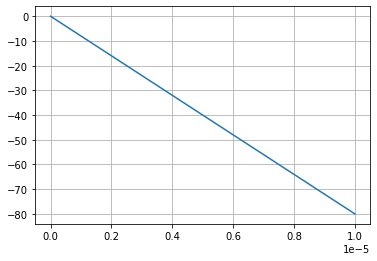

In [17]:
plt.plot(alpha_profile,-e_L)
plt.grid()

In [20]:
np.arctan(-1e-5)

-9.999999999666668e-06